## Deep Learning
### is a new area of Machine Learning research, which has been introduced with the objective of moving Machine Learning closer to one of its original goals: Artificial Intelligence.

Why ‘Deep Learning’  is called deep? It is because of the structure of ANNs. Earlier 40 years back, neural networks were only 2 layers deep as it was not computationally feasible to build larger networks. Now it is common to have neural networks with 10+ layers and even 100+ layer ANNs are being tried upon.

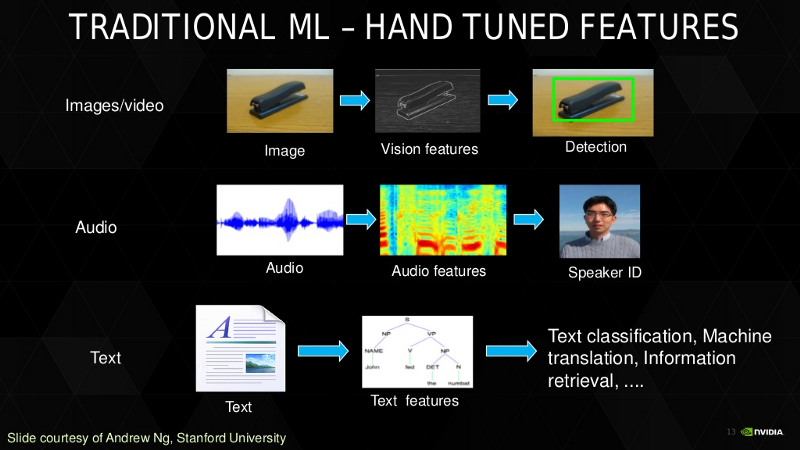

In [23]:
from IPython.display import Image
Image("img/1.png")


### 1. A ConvNet architecture is in the simplest case a list of Layers that transform the image volume into an output volume (e.g. holding the class scores)
### 2. There are a few distinct types of Layers (e.g. CONV/FC/RELU/POOL are by far the most popular)
### 3. Each Layer accepts an input 3D volume and transforms it to an output 3D volume through a differentiable function
### 4. Each Layer may or may not have parameters (e.g. CONV/FC do, RELU/POOL don’t)
### 5. Each Layer may or may not have additional hyperparameters (e.g. CONV/FC/POOL do, RELU doesn’t)

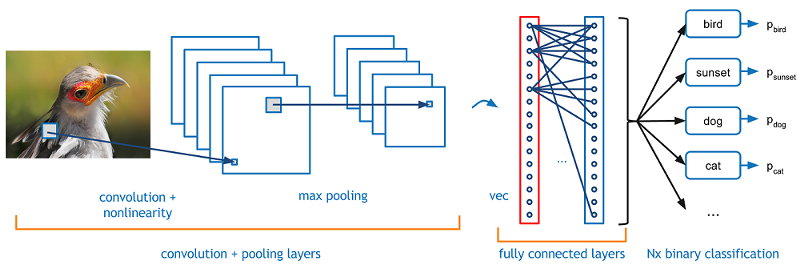

In [21]:
Image("img/2.png")

## Traffic Sign Classification

 I'm using Pythong 3.5, Keras, Numpy, Sci-kit Image, and Matplotlib. All pretty standard tools in machine learning. 

In [19]:
import os
import h5py
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D


from keras.preprocessing.image import  img_to_array
import skimage.data
import skimage.transform
import matplotlib
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [3]:

import numpy as np


from PIL import Image


from sklearn.cross_validation import train_test_split
ROOT_PATH = ""
train_data_dir = os.path.join(ROOT_PATH, "datasets/Training/")
test_data_dir = os.path.join(ROOT_PATH, "datasets/Testing/")
print(train_data_dir)

m,n = 50,50


classes=os.listdir(train_data_dir)
x=[]
y=[]
for fol in classes:
#     print (fol)
    imgfiles=os.listdir(train_data_dir+fol);
    for img in imgfiles :
        
        if img.endswith(".ppm"):
            im=Image.open(train_data_dir+fol+'/'+img);
            im=im.convert(mode='RGB')
            imrs=im.resize((m,n))
            imrs=img_to_array(imrs)/255;
            imrs=imrs.transpose(2,0,1);
            imrs=imrs.reshape(3,m,n);
            x.append(imrs)
            y.append(fol)


e:\tensor2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


datasets/Training/


In [4]:
print(x[0])
x=np.array(x)
y=np.array(y)
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=4)
# print(x_train[0])



[[[ 0.83137256  0.81568629  0.86274511 ...,  0.13333334  0.10196079
    0.11764706]
  [ 1.          0.93333334  0.92156863 ...,  0.1254902   0.11372549
    0.29411766]
  [ 0.8509804   0.82745099  0.81960785 ...,  0.05882353  0.10588235
    0.41568628]
  ..., 
  [ 0.32941177  0.29019609  0.18431373 ...,  0.58823532  0.58039218
    0.96470588]
  [ 0.57647061  0.49803922  0.36470589 ...,  0.0627451   0.41568628
    0.90588236]
  [ 0.45882353  0.39215687  0.27843139 ...,  0.27058825  0.48235294  1.        ]]

 [[ 0.32549021  0.28627452  0.19215687 ...,  0.56470591  0.56470591
    0.97647059]
  [ 0.60392159  0.52156866  0.36078432 ...,  0.08627451  0.28627452
    0.51372552]
  [ 0.47450981  0.39215687  0.29411766 ...,  0.24705882  0.3019608
    0.41176471]
  ..., 
  [ 0.24705882  0.22745098  0.22352941 ...,  0.22352941  0.22745098
    0.25882354]
  [ 0.17254902  0.13333334  0.14117648 ...,  0.53333336  0.47843137
    0.47450981]
  [ 0.28627452  0.38431373  0.38039216 ...,  0.05490196  0.066

In [9]:

batch_size=32
nb_classes=len(classes)
nb_epoch=5
nb_filters=32
nb_pool=2
nb_conv=3

In [10]:

uniques, id_train=np.unique(y_train,return_inverse=True)
Y_train=np_utils.to_categorical(id_train,nb_classes)
uniques, id_test=np.unique(y_test,return_inverse=True)
Y_test=np_utils.to_categorical(id_test,nb_classes)

In [11]:


model= Sequential()
model.add(Convolution2D(nb_filters,nb_conv,nb_conv,border_mode='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'));
model.add(Convolution2D(nb_filters,nb_conv,nb_conv));
model.add(Activation('relu'));
model.add(MaxPooling2D(pool_size=(nb_pool,nb_pool)));
model.add(Dropout(0.5));
model.add(Flatten());
model.add(Dense(128));
model.add(Dropout(0.5));
model.add(Dense(nb_classes));
model.add(Activation('softmax'));
model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])  

e:\tensor2\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(3, 50, 50..., padding="same")`
  """
e:\tensor2\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  import sys


In [12]:
model.fit(x_train,Y_train,batch_size=batch_size,nb_epoch=nb_epoch,verbose=1,validation_data=(x_test, Y_test))
model.save('traffic.h5')
model.save_weights('my_model_weights.h5')
json_string = model.to_json()
with open('traffic.json','w') as f:
    f.write(json_string)
    

e:\tensor2\lib\site-packages\keras\models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 3660 samples, validate on 915 samples
Epoch 1/5
3660/3660 [==============================] - 368s - loss: 2.2517 - acc: 0.4981 - val_loss: 7.2220 - val_acc: 0.0503
Epoch 2/5
3660/3660 [==============================] - 369s - loss: 0.8613 - acc: 0.7923 - val_loss: 8.1052 - val_acc: 0.0317
Epoch 3/5
3660/3660 [==============================] - 371s - loss: 0.4845 - acc: 0.8735 - val_loss: 10.2649 - val_acc: 0.0350
Epoch 4/5
3660/3660 [==============================] - 424s - loss: 0.3336 - acc: 0.9183 - val_loss: 11.2927 - val_acc: 0.0328
Epoch 5/5
3660/3660 [==============================] - 436s - loss: 0.2363 - acc: 0.9363 - val_loss: 11.6667 - val_acc: 0.0415


In [18]:
path1='datasets/Try/'
files=os.listdir(path1)
img=files[0]
im = Image.open(path1 +img)
imrs = im.resize((m,n))
imrs=img_to_array(imrs)/255
imrs=imrs.transpose(2,0,1)
imrs=imrs.reshape(3,m,n)

x=[]
x.append(imrs)
x=np.array(x)

preds= model.predict(x)[0]
print (preds)
print (preds[0])
print(np.argmax(preds))


[  7.61242991e-05   9.99881625e-01   2.23523472e-07   4.83598672e-09
   1.01809761e-09   2.92008806e-10   4.33191047e-08   1.07391784e-08
   2.03328068e-06   3.41971287e-08   4.60547244e-06   4.58239015e-07
   4.07369185e-07   4.93707368e-08   7.28902819e-07   2.32468551e-06
   5.28162218e-07   3.15904600e-08   9.25006862e-06   1.53545091e-06
   8.55687610e-09   2.05015169e-07   2.07064190e-07   2.19201596e-07
   5.50552104e-11   4.06401632e-08   1.18694643e-07   3.75984666e-09
   3.05681502e-09   3.90167507e-08   1.61310654e-09   1.35063877e-10
   9.36488220e-08   4.19040767e-08   2.20339214e-09   1.95291001e-08
   2.54338772e-10   7.67606811e-10   1.39312945e-07   5.61213298e-09
   1.18950972e-07   9.44202725e-07   2.71478857e-08   3.99644087e-08
   6.76241979e-11   4.11947553e-07   2.46820009e-09   7.43476503e-10
   1.14736496e-08   4.68282924e-09   2.72008567e-08   2.82766321e-09
   3.45795015e-09   1.29860382e-07   4.70019152e-08   3.53882568e-09
   1.24632193e-09   2.99653469e-10

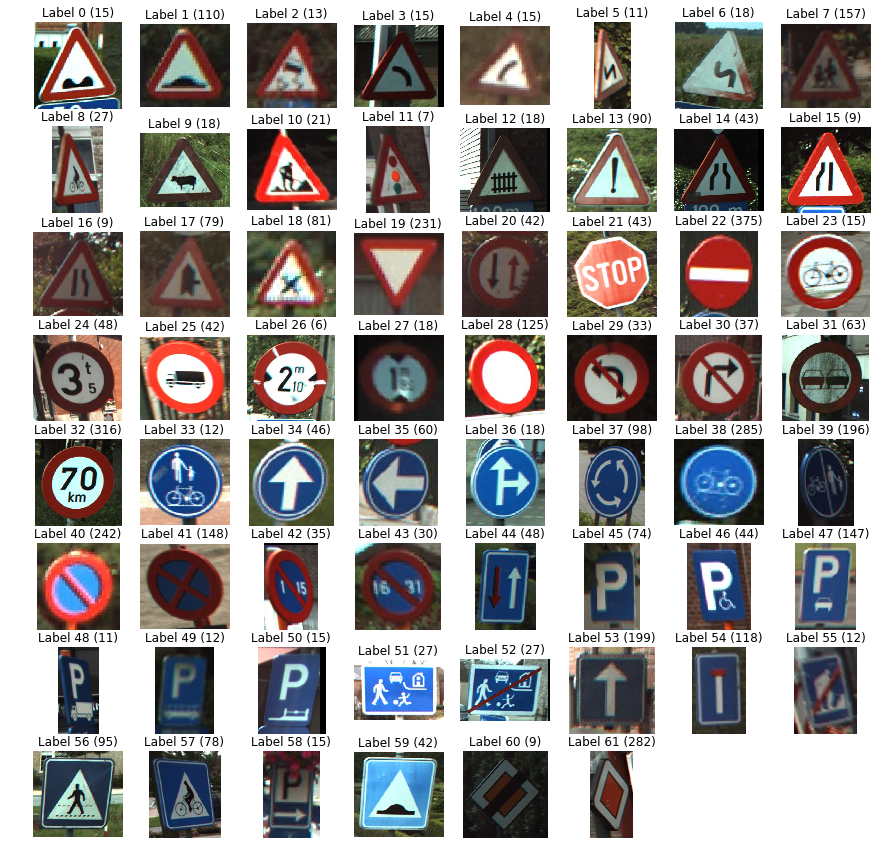

In [24]:
def load_data(data_dir):
  
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) if f.endswith(".ppm")]
       
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels
images, labels = load_data(train_data_dir)
def display_images_and_labels(images, labels):
    unique_labels = set(labels)
    plt.figure(figsize=(15, 15))
    i = 1
    for label in unique_labels:
        # Pick the first image for each label.
        image = images[labels.index(label)]
        plt.subplot(8, 8, i)  # A grid of 8 rows x 8 columns
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(image)
    plt.show()

display_images_and_labels(images, labels)
#for simple reference go to : https://medium.com/@waleedka/traffic-sign-recognition-with-tensorflow-629dffc391a6

Check out Pretrained Model 
 [30 epochs](/tree/Models/)